<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/%EC%A4%91%EC%9A%94%EB%AA%A8%EC%9D%8C_%EC%96%91%EC%9E%90%ED%9A%8C%EB%A1%9CVisualization%EB%B0%A9%EB%B2%95%EB%93%A4_20240702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m pip install qiskit[visualization]
!python3 -m pip install qiskit-ionq
!python3 -m pip install qiskit-ibm-provider
!python3 -m pip install qiskit-aer
!python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-3cehl5ko
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-3cehl5ko
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) ... done


In [ ]:
# 참조: https://github.com/Qiskit/qiskit-ibm-provider/blob/main/docs/tutorials/1_the_ibm_quantum_account.ipynb
# IBMQ Cloud 서비스 사용하기 위한 준비
from qiskit_ibm_provider import IBMProvider

# IBM  Provider에 등록된 계정 정보를 입력합니다.
IBMProvider.save_account(token='91762dc4c1496e27006d7b6b7f49eead26c56a0d0779ea686790b6e790efaf08f934614b06a7e551fad25b3e0f9373510dd14777bdae565133048b4db983cb4b',overwrite=True)

# IBM Provider로 접속합니다.
ibm_provider = IBMProvider()

# 양자회로를 수행한 양자컴퓨터 백엔드 리스트 출력
#print(ibm_provider.backends())
print("Available backends:")

for backend in ibm_provider.backends():
  print(backend.name)
###for

<ipython-input-2-be2d2abb852d>:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


RequestsApiError: '401 Client Error: Unauthorized for url: https://auth.quantum-computing.ibm.com/api/users/loginWithToken. Login failed., Error code: 3446.'

In [ ]:
# IonQ H/W Cloud를 사용하기 위한 준비
from qiskit_ionq import IonQProvider

# IonQ Cloud 서비스 사용하기 위한 준비
ionq_provider = IonQProvider("BfclEvBY5nVQbPlAMG2dYbqaUbsZIc01") #IonQ Cloud에서 Access Key를 복사해 넣어야 합니다.

# 백엔드 리스트 출력
print("Available backends:")

for backend in ionq_provider.backends():
  print(backend.name())
###for

In [ ]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit_aer import Aer

In [ ]:
from qiskit import *
from qiskit.visualization import plot_histogram

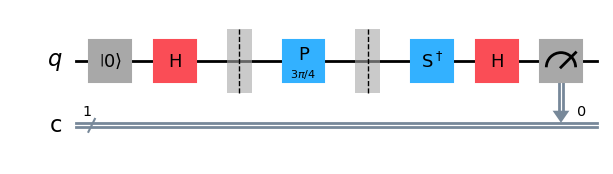

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.p(3 * pi / 4, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw('mpl')

In [ ]:
# execute the quantum circuit
backend = Aer.get_backend(name='qasm_simulator') # the device to run on
circuit = circuit.compose(other=circuit)
result = backend.run(circuits=circuit, shots=1024).result()
counts = result.get_counts(experiment=circuit)
print(counts)

{'1': 169, '0': 855}


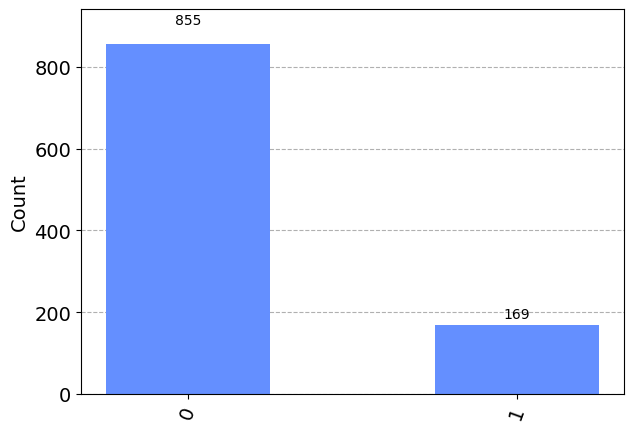

In [ ]:
plot_histogram(data=counts)


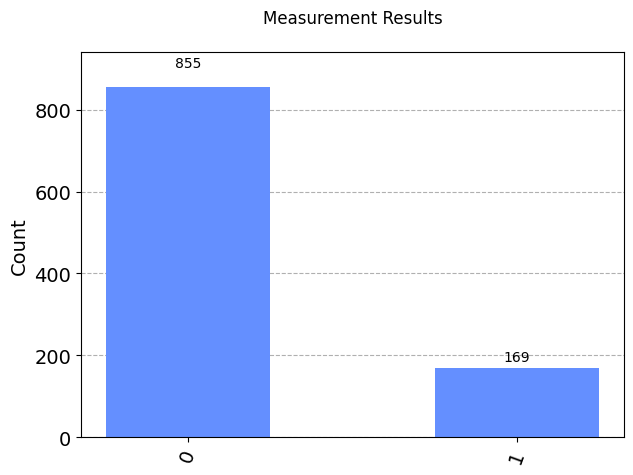

In [ ]:
plot_histogram(data=counts, title="Measurement Results\n" )

In [ ]:
# create the legend for the two quantum states
# created before, namely the excited state |1> and
# the quantum superposition state |+>
legend = ["Excited State", "Plus State"]

# plot the histogram for the quasi-distributions
# for the two quantum states created before,
# namely the excited state |1> and
# the quantum superposition state |+>
plot_histogram( [ quasi_dists_ket_1[0], quasi_dists_ket_plus[0] ],
                  legend=legend, title="Measurement Results\n" )

In [ ]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [ ]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result = backend.run(circuit).result()
psi = result.get_statevector(experiment=circuit)

In [ ]:
plot_state_city(state=psi)


In [ ]:
plot_state_qsphere(state=psi)

In [ ]:
plot_bloch_multivector(state=psi)

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')

from qiskit.visualization import visualize_transition
visualize_transition(qc)
#20초 정도 걸려요


In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw('mpl')

from qiskit.visualization import visualize_transition
visualize_transition(qc)
#20초 정도 걸려요

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.draw('mpl')

from qiskit.visualization import visualize_transition
visualize_transition(qc)
#20초 정도 걸려요

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

#circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
#circuit.p(3 * pi / 4, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])
#circuit.measure(qreg_q[0], creg_c[0])

In [ ]:
circuit.draw('mpl')

In [ ]:
# execute the quantum circuit
backend = Aer.get_backend(name='statevector_simulator') # the device to run on
result = backend.run(circuit).result()
psi = result.get_statevector(experiment=circuit)

In [ ]:
plot_bloch_multivector(state=psi)

In [ ]:
plot_state_city(state=psi)

In [ ]:
from qiskit.visualization import visualize_transition
visualize_transition(circuit)

In [ ]:
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import array_to_latex

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw('mpl')

In [ ]:
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = statevector_backend.run(qc, shots=1024).result().get_statevector()

display(qc.draw('mpl'))
print("\n")
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(final_state)

In [ ]:
from math import sqrt, pi

In [ ]:
qc = QuantumCircuit(1)
initial_state = [0, 1]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc, shot=1024).result()
out_state = result.get_statevector()
print(out_state)

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(out_state)

NameError: name 'qc' is not defined

In [ ]:
qc.measure_all()
qc.draw('mpl')

In [ ]:
result = backend.run(qc, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

**정규화** *Normalization*

In [ ]:
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

**전역위상** *Global Phase*

In [ ]:
qc = QuantumCircuit(1)
initial_state = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw('mpl')

In [ ]:
out_state = backend.run(qc, shots=1024).result().get_statevector()
print("Qubit State: " + str(out_state))

#display(qc.draw('mpl'))
print("\n")
array_to_latex(out_state, pretext="\\text{Statevector} = ", precision=1)
print("\n")
plot_bloch_multivector(out_state)

큐빗의 시각적 표현

In [ ]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,pi/2,0], coord_type='spherical')

In [ ]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,0,0], coord_type='spherical')

In [ ]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1,pi,0], coord_type='spherical')

In [ ]:
from math import pi
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector([1, pi/2,0], coord_type='spherical')

In [ ]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

# 블로흐 벡터 생성
#([X, Y, Z])
bloch_vector = np.array([0.5, -0.5, 0.75])

# 블로흐 벡터 표현
plot_bloch_vector(bloch_vector, coord_type='spherical')



In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import Initialize

# 초기화할 상태를 정의합니다.
desired_vector = [1 / np.sqrt(2), 1 / np.sqrt(2)]

# Initialize 객체를 생성합니다.
init_gate = Initialize(desired_vector)

# 양자 회로를 생성하고 초기화 게이트를 추가합니다.
qc = QuantumCircuit(1)  # 1개의 양자 비트로 양자 회로를 생성합니다.
qc.append(init_gate, [0])  # 초기화 게이트를 양자 회로에 추가합니다.

# 양자 회로를 그립니다.
print(qc)
qc.draw('mpl')


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


In [ ]:
# 2개의 큐비트(벡터)와 1개의 클래식 비트(결과)를 생성합니다.
qreg = QuantumRegister(2, name="q")
creg = ClassicalRegister(1, name="c")

# 큐비트 회로를 생성합니다.
circuit = QuantumCircuit(qreg, creg)


In [ ]:
# 두 벡터를 입력합니다. (예: [1, 2], [3, 4])
vector1 = [1, 2]
vector2 = [3, 4]


In [ ]:
# 각 벡터 요소를 큐비트 상태로 변환합니다.
for i in range(len(vector1)):
    if vector1[i] == 1:
        circuit.x(qreg[i])

for i in range(len(vector2)):
    if vector2[i] == 1:
        circuit.x(qreg[i])

# Hadamard 연산을 사용하여 모든 큐비트를 슈퍼포지션 상태로 만듭니다.
for i in range(len(vector1)):
    circuit.h(qreg[i])

# Toffoli 게이트를 사용하여 내적 계산을 수행합니다.
for i in range(len(vector1)):
    for j in range(len(vector2)):
        print(i, j)
        if i != j:
          circuit.ccx(qreg[i], qreg[j], qreg[0])

# 측정을 수행합니다.
circuit.measure(qreg[0], creg[0])


0 0
0 1


CircuitError: 'duplicate qubit arguments'

In [ ]:
# 측정 결과를 얻기 위한 백엔드를 선택합니다.
backend = Aer.get_backend('statevector_simulator')


# 측정 결과를 실행합니다.
job = backend.run(circuit, shots=1020).result()

# 측정 결과를 가져옵니다.
result = job.get_counts()

# 측정 결과를 기반으로 내적을 계산합니다.
inner_product = 0
for outcome, count in result.items():
    if outcome == '1':
        inner_product = count

# 내적 결과 출력합니다.
print("두 벡터의 내적:", inner_product)


두 벡터의 내적: 0


In [ ]:
# required import of libraries and modules

# import array to latex converter from
# IBM's Qiskit visualization module
from qiskit.visualization import array_to_latex

# import state-vector and random state-vector from
# IBM's Qiskit quantum information module
from qiskit.quantum_info import Statevector, random_statevector

# import abstract operator and pauli operator from
# IBM's Qiskit quantum information's operators module
from qiskit.quantum_info.operators import Operator, Pauli

# import quantum circuit from IBM's Qiskit
from qiskit import QuantumCircuit

# import hadamard gate and CX/CNOT gate from IBM's Qiskit
from qiskit.circuit.library import HGate, CXGate

# import numpy
import numpy as np

In [ ]:
# define the column-vector for |0>
ket0 = [[1],[0]]

# convert the column-vector |0> to latex
array_to_latex(ket0)

<IPython.core.display.Latex object>

In [ ]:
# define the row-vector for <0|
bra0 = [1, 0]

# convert the row-vector <0| to latex
array_to_latex(bra0)

<IPython.core.display.Latex object>

In [ ]:
# put your answer answer here for the column-vector |1>
ket1 = [ [0], [1] ]

# put your answer here for the row-vector <1|
bra1 = [0, 1]

In [ ]:
# create a state-vector for the row-vector <0|
sv_bra0 = Statevector(bra0)

# show the object of the state-vector for the row-vector <0|
sv_bra0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [ ]:
# draw the state-vector for the row-vector <0| in latex
sv_bra0.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# create a complex state-vector for multiple qubits
sv_eq = Statevector( [ 1/2, 3/4, 4/5, 6/8 ] )

# draw the complex state-vector created before in latex
sv_eq.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# check if the complex state-vector created before
# is valid for a quantum state (i.e., if it is normalised)
sv_eq.is_valid()

False

In [ ]:
# create your valid statevector here
sv_valid = Statevector( [ 1/2, 1/2, 1/2, 1/2 ] )

# draw the complex state-vector created before in latex
sv_valid.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# check if the complex state-vector created before
# is valid for a quantum state (i.e., if it is normalised)
sv_valid.is_valid()

True

In [ ]:
# create an operator for the row-vector <0|
op_bra0 = Operator(bra0)

# show the object of the operator for the row-vector <0|
op_bra0

Operator([1.+0.j, 0.+0.j],
         input_dims=(), output_dims=(2,))


In [ ]:
# create an operator for the column-vector |0>
op_ket0 = Operator(ket0)

# apply the tensor product of the operator
# created before to the operator applied to
# the row-vector <0|
New_Operator = op_bra0.tensor(op_ket0)
New_Operator

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j]],
         input_dims=(), output_dims=(2, 2))


In [ ]:
New_Operator.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
# create the state-vector for
# the quantum superposition state |+>
plus_state = Statevector.from_label("+")

# convert the state-vector created before to latex
plus_state.draw("latex")

<IPython.core.display.Latex object>

In [ ]:
    # if the 1st bit of the classical register of
    # the dynamic quantum circuit has the classical state 1
    with qc.if_test( ( cr[0], True ) ):

        # apply the phase correction of -pi / 2 to
        # the 1st qubit of the quantum register with a P gate
        qc.p( -np.pi / 2, 0 )
